# ***1. Importing Libraries***

In [16]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [17]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [18]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)

/kaggle/input
/kaggle/input/teecth-classification
/kaggle/input/teecth-classification/Teeth_Dataset
/kaggle/input/teecth-classification/Teeth_Dataset/Validation
/kaggle/input/teecth-classification/Teeth_Dataset/Validation/OC
/kaggle/input/teecth-classification/Teeth_Dataset/Validation/CaS
/kaggle/input/teecth-classification/Teeth_Dataset/Validation/OT
/kaggle/input/teecth-classification/Teeth_Dataset/Validation/CoS
/kaggle/input/teecth-classification/Teeth_Dataset/Validation/Gum
/kaggle/input/teecth-classification/Teeth_Dataset/Validation/MC
/kaggle/input/teecth-classification/Teeth_Dataset/Validation/OLP
/kaggle/input/teecth-classification/Teeth_Dataset/Training
/kaggle/input/teecth-classification/Teeth_Dataset/Training/OC
/kaggle/input/teecth-classification/Teeth_Dataset/Training/CaS
/kaggle/input/teecth-classification/Teeth_Dataset/Training/OT
/kaggle/input/teecth-classification/Teeth_Dataset/Training/CoS
/kaggle/input/teecth-classification/Teeth_Dataset/Training/Gum
/kaggle/input/t

# ***2.Read Data***

In [19]:
train_path = '/kaggle/input/teecth-classification/Teeth_Dataset/Training'
classes = os.listdir(train_path)
print(f"Detected Folders: {classes}")

Detected Folders: ['OC', 'CaS', 'OT', 'CoS', 'Gum', 'MC', 'OLP']


In [20]:
train = '/kaggle/input/teecth-classification/Teeth_Dataset/Training'
test = '/kaggle/input/teecth-classification/Teeth_Dataset/Testing'
val = '/kaggle/input/teecth-classification/Teeth_Dataset/Validation'

In [21]:
from collections import Counter

def count_classes(dataset_path):
    class_counts = {}
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path,class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

In [22]:
train_counts = count_classes(train)
val_counts = count_classes(val)
test_counts = count_classes(test)

In [23]:
print("Training Data Distribution:")
print(train_counts)

print("\nValidation Data Distribution:")
print(val_counts)

print("\nTesting Data Distribution:")
print(test_counts)

Training Data Distribution:
{'OC': 324, 'CaS': 480, 'OT': 393, 'CoS': 450, 'Gum': 360, 'MC': 540, 'OLP': 540}

Validation Data Distribution:
{'OC': 108, 'CaS': 160, 'OT': 131, 'CoS': 149, 'Gum': 120, 'MC': 180, 'OLP': 180}

Testing Data Distribution:
{'OC': 108, 'outputs': 160, 'output': 160, 'CaS': 160, 'out': 160, 'OT': 131, 'CoS': 149, 'Gum': 120, 'MC': 180, 'OLP': 180}


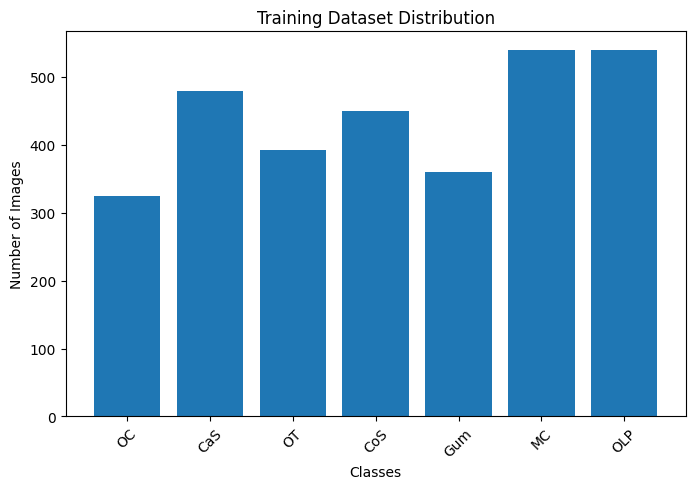

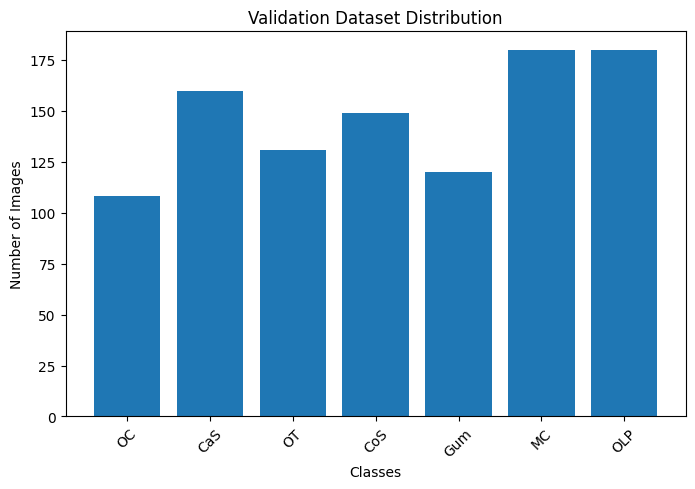

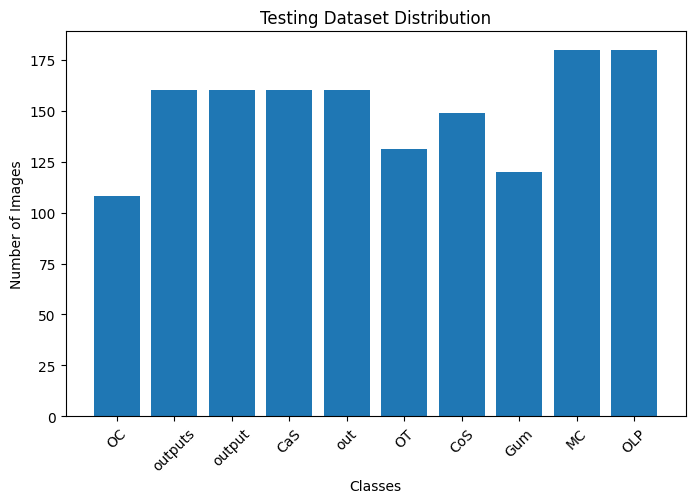

In [24]:
def plot_class_distribution(class_counts, title):
    plt.figure(figsize=(8,5))
    plt.bar(class_counts.keys(),class_counts.values())
    plt.title(title)
    plt.xlabel("Classes")
    plt.ylabel("Number of Images")
    plt.xticks(rotation=45)
    plt.show()

plot_class_distribution(train_counts, "Training Dataset Distribution")
plot_class_distribution(val_counts, "Validation Dataset Distribution")
plot_class_distribution(test_counts, "Testing Dataset Distribution")

In [25]:
import matplotlib.image as mpimg
import random

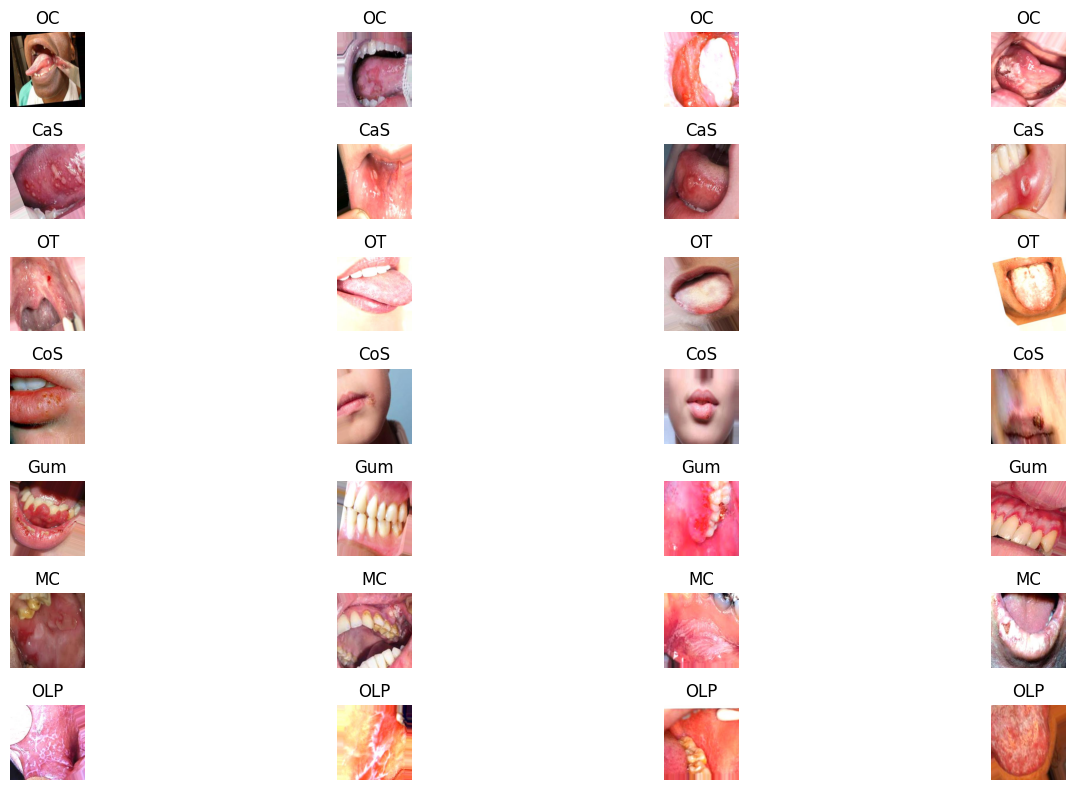

In [26]:
def show_sample_images(dataset_path, samples_per_class=1):
    classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
    plt.figure(figsize=(15, 8))
    
    img_index = 1
    for class_name in classes:
        class_path = os.path.join(dataset_path, class_name)
        images = os.listdir(class_path)
        
        for i in range(samples_per_class):
            img_path = os.path.join(class_path, random.choice(images))
            img = mpimg.imread(img_path)
            
            plt.subplot(len(classes), samples_per_class, img_index)
            plt.imshow(img)
            plt.axis('off')
            plt.title(class_name)
            img_index += 1
    
    plt.tight_layout()
    plt.show()

show_sample_images(train, samples_per_class=4)

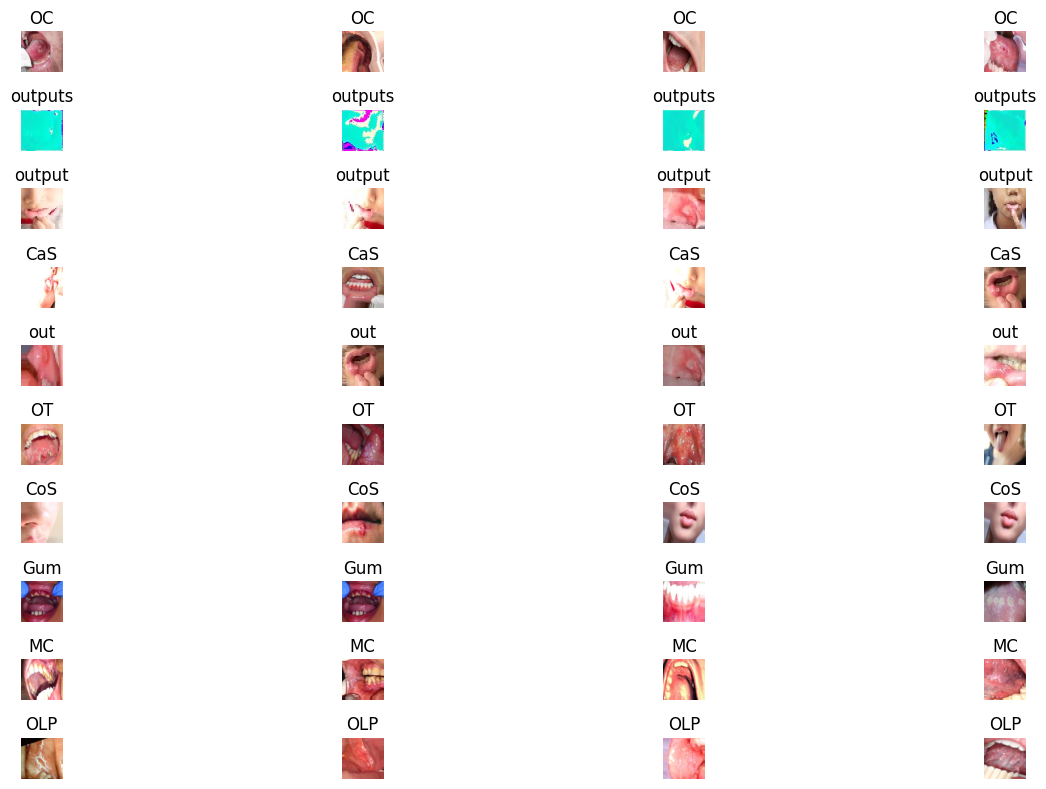

In [27]:
show_sample_images(test, samples_per_class=4)

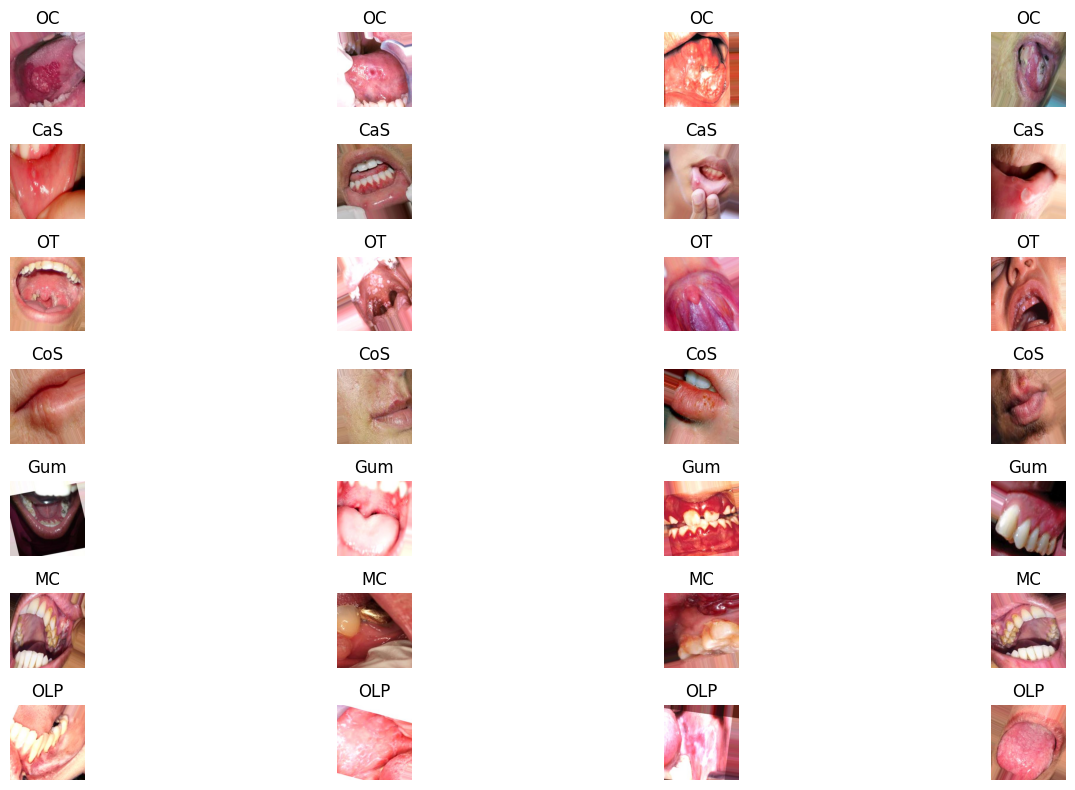

In [28]:
show_sample_images(val, samples_per_class=4)

# ***3.Image Preprocessing + Data Augmentation***


In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input


In [30]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8,1.2],
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

In [31]:
img_height, img_width = 224, 224
batch_size = 32 
target_classes = ['OLP', 'MC', 'Gum', 'CoS', 'OT', 'CaS', 'OC']

# First create generators
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/teecth-classification/Teeth_Dataset/Training',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    classes=target_classes
)

val_generator = val_datagen.flow_from_directory(
    '/kaggle/input/teecth-classification/Teeth_Dataset/Validation',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    classes=target_classes
)

test_generator = val_datagen.flow_from_directory(
    '/kaggle/input/teecth-classification/Teeth_Dataset/Testing',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False,
    classes=target_classes
)

num_classes = train_generator.num_classes
print(f"Category number confirmed: {num_classes}")
print(f"Detected Classes: {train_generator.class_indices}")

Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Category number confirmed: 7
Detected Classes: {'OLP': 0, 'MC': 1, 'Gum': 2, 'CoS': 3, 'OT': 4, 'CaS': 5, 'OC': 6}


In [32]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

class_weights = dict(enumerate(class_weights))

print("Class Weights:", class_weights)


Class Weights: {0: np.float64(0.8166666666666667), 1: np.float64(0.8166666666666667), 2: np.float64(1.225), 3: np.float64(0.98), 4: np.float64(1.1221374045801527), 5: np.float64(0.91875), 6: np.float64(1.3611111111111112)}


# ***4.Model Applying*** 

In [36]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models

base_model = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

base_model.trainable = False  # freeze first

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


I0000 00:00:1771062830.727340      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13757 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1771062830.733444      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13757 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [37]:
model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    class_weight=class_weights
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


I0000 00:00:1771062844.052122     173 service.cc:152] XLA service 0x7d6a44014110 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1771062844.052162     173 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1771062844.052168     173 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1771062846.238053     173 cuda_dnn.cc:529] Loaded cuDNN version 91002
2026-02-14 09:54:12.698737: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-14 09:54:12.842159: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-14 09:54:13.177691: E external/local_xl

26/97 ━━━━━━━━━━━━━━━━━━━━ 30s 428ms/step - accuracy: 0.2895 - loss: 2.4940

2026-02-14 09:54:38.141795: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-14 09:54:38.280578: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-14 09:54:38.589812: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-14 09:54:38.728568: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-14 09:54:39.437365: E external/local_xla/xla/stream_

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 580ms/step - accuracy: 0.4245 - loss: 1.9266

2026-02-14 09:55:30.444541: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-14 09:55:30.579390: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-14 09:55:30.883906: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-14 09:55:31.023802: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-14 09:55:31.694285: E external/local_xla/xla/stream_

97/97 ━━━━━━━━━━━━━━━━━━━━ 101s 775ms/step - accuracy: 0.4257 - loss: 1.9219 - val_accuracy: 0.7860 - val_loss: 0.7449
Epoch 2/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 38s 387ms/step - accuracy: 0.7107 - loss: 0.8063 - val_accuracy: 0.8794 - val_loss: 0.4187
Epoch 3/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 38s 390ms/step - accuracy: 0.7809 - loss: 0.6283 - val_accuracy: 0.9290 - val_loss: 0.2720
Epoch 4/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 38s 388ms/step - accuracy: 0.8143 - loss: 0.5210 - val_accuracy: 0.9261 - val_loss: 0.2673
Epoch 5/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 38s 389ms/step - accuracy: 0.8589 - loss: 0.3964 - val_accuracy: 0.9514 - val_loss: 0.1508
Epoch 6/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 38s 393ms/step - accuracy: 0.8578 - loss: 0.3947 - val_accuracy: 0.9611 - val_loss: 0.1395
Epoch 7/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 38s 389ms/step - accuracy: 0.8747 - loss: 0.3529 - val_accuracy: 0.9553 - val_loss: 0.1429
Epoch 8/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 39s 399ms/step - accuracy: 0.8766 - loss: 0.3398 - val_accuracy: 0.97

Generating predictions...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 17s 334ms/step


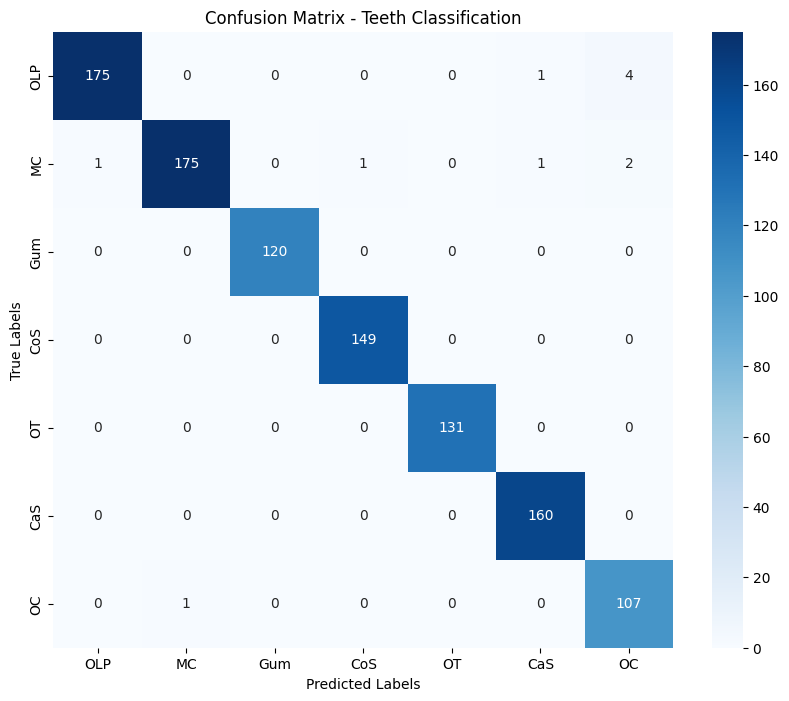


Classification Report:

              precision    recall  f1-score   support

         OLP       0.99      0.97      0.98       180
          MC       0.99      0.97      0.98       180
         Gum       1.00      1.00      1.00       120
         CoS       0.99      1.00      1.00       149
          OT       1.00      1.00      1.00       131
         CaS       0.99      1.00      0.99       160
          OC       0.95      0.99      0.97       108

    accuracy                           0.99      1028
   macro avg       0.99      0.99      0.99      1028
weighted avg       0.99      0.99      0.99      1028



In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

print("Generating predictions...")

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)


y_true = test_generator.classes

class_labels = list(test_generator.class_indices.keys())   


cm = confusion_matrix(y_true, y_pred)


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, 
            yticklabels=class_labels)
plt.title('Confusion Matrix - Teeth Classification')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

# **Saving The Model**

In [48]:
model.save("teeth_model_pertained.keras")